# Generating Random numbers

## Linear Congruentional Generators

These generate a set of uniform values on $\{0, 1, 2, 3, ..., m-1\}$. A seed value of $X_0$ is provided and the next values are optained iteratively using the formula:
$$X_{n+1}=aX_n+c \textit{ mod }m$$
If one desires to get values in the interval $[0, 1]$, one can divide the resultant data by m. While these may indeed be uniform variates, they are discrete.

In [2]:
import math

def lin_cong_gen(n,a,c,m,x0):
    """Generate list of n unif dist RV"""
    rnd_list=[None]*n
    rnd_list[0]=(a*x0+c)%m
    for i in range(1,n):
        rnd_list[i]=(a*rnd_list[i-1]+c)%m
    return rnd_list

Lets obtain some data setting the number of desired data values to $n=10$ the constants fin the formula set as $a=11$ ,
$c=-4$, $m=999$ and the seed value as $X_0=2000$.

In [3]:
n,a,c,m,x0=10,11,-4,999,2000
l=lin_cong_gen(n,a,c,m,x0)
l

[18, 194, 132, 449, 939, 335, 684, 527, 798, 782]

Dividing the list of values by $m$ scales to output to values on $[0,1]$ as follows:

In [4]:
for i in range(len(l)):
    l[i]=l[i]/m
l

[0.018018018018018018,
 0.1941941941941942,
 0.13213213213213212,
 0.4494494494494494,
 0.93993993993994,
 0.3353353353353353,
 0.6846846846846847,
 0.5275275275275275,
 0.7987987987987988,
 0.7827827827827828]

## Python Modules

However, Python has inbuilt packages that are well able to produce pseudo-random numbers. The Scipy stats submodule enables us to generatenumpy arrays of random numbers of our choice. In addition, Numpy also has alternative functions which we include here in order to be as general as possible. This list is not exhaustive though.

In [5]:
from scipy.stats import uniform as u
uni_array=u.rvs(size=10)

uni_array

array([0.8500983 , 0.54453251, 0.82669015, 0.07988761, 0.69833311,
       0.1906848 , 0.87541818, 0.45441273, 0.4197509 , 0.68136546])

In [6]:
import numpy as np

u=np.random.uniform(0,math.pi,10)

u

array([1.90776378, 2.51666751, 2.10365995, 2.97752046, 3.02555289,
       0.56008051, 2.75656365, 2.1633808 , 1.17355407, 0.44612015])

## Inverse Trnsform Methods

While we may have inbuilt Python modules to abtain random variables, we need to look at some methods known in literature to obtain some random variables. One of these methods is the inverse transform method as follows:

Let the random variable (RV) $X$ have a probability distribution function (PDF) given by $f(x)$ defined on an interval $[a,b]$ and a cumulative distribution functio (CDF) 
$$F(x)=\int_a^xf(t)dt.$$
Assume also that $F(x)$ is invertible then, it follows thatfor some uniform random number $u$ the RV $X$ is given by
$$X=F^{-1}(u).$$

#### Example:
Let us consider a simple example. Let X be an exponential random variable with a PDF $f(x)=\lambda e^{-\lambda x}$ defined on $\mathbb{R}^+$ and CDF $F(x)= 1-e^{-\lambda x}$. As a result, the inverse of the CDF is given as $F^{-1}(x)=-\ln(1-x)/\lambda$.

The Python implementation is given below:

In [7]:
def exp_RV(lam,n=1):
    '''This function returns one exponentially distributed RV or an array of n values'''
    if n==1:
        u=np.random.uniform()
        ex=-math.log(1-u)/lam
    else:
        u=np.random.uniform(0,1,n)
        ex=-np.log(1-u)/lam
    return ex

In [8]:
rr=exp_RV(2.1,4)
rr

array([1.0910257 , 0.02718946, 0.51008412, 0.28703192])

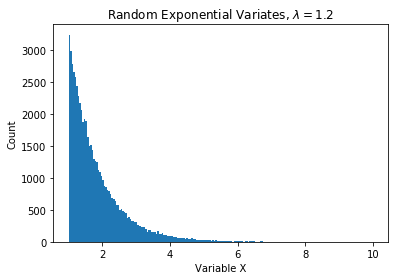

In [10]:
exp_arr=exp_RV(1.2,200000)

import matplotlib.pyplot as plt

bins = np.linspace(math.ceil(min(exp_arr)), 
                   math.floor(max(exp_arr)),
                   200) # fixed number of bins


plt.hist(exp_arr,bins=bins)
plt.title('Random Exponential Variates, $\lambda = 1.2$')
plt.xlabel('Variable X')
plt.ylabel('Count')

plt.show()

## Rejection Method:

In some cases, the CDF is not invertible or may require numeriacl ethods to invert. In this case we opt for the "Acceptance-Rejection" methods.

First we will explain the logic from a lay person's point of view.

Let $X$ be the RV we would like to sample with PDF $f(x)$ and suppose $Y$ is an RV PDF $g(y)$ that satisfies the following properties:

1. the distributions of $X$ and $Y$ need to overlap
2. the distribution of $Y$ should be easy to compute
3. The disctributions of $X$ and $Y$ should be close to each other such that $\forall x$
$$\frac{f(x)}{g(x)}\leq c$$
for some $c$.

NB: we desire to hace $c$ as close to 1 as possible.



#### Algorithm:

1. Generate a uniform random number on $[0,1]$.
2. Generate the RV $Y$.
3. A. If $u<{f(x)}/c{g(x)}$, then set X=Y
   B. Else, reject and return to 1.

#### Remarks:
The choice of the pair $X$ and $Y$ is important. 
Let N be number of times the algorithm is applied before a value is accepted. N follows a Geometric distribution with probability of success $P(Success)=p$. In addition, the probability of running the algorithm $k\geq 1$ times before success, then $P(N=k)=(1-p)^{k-1}p$.

Also, the average number of times is $1/p$ and in particular $p=1/c$.


#### Example:

Lets generate some normal $X$ by applying the Acceptance-Rejection method with the exponential distribution.

In [11]:
def norm_pdf(z):
    '''Normal distribution PDF'''
    r=2*np.exp(-z*z/2)/np.sqrt(2*np.pi)
    return r

In [12]:
data_size=20000
norm_array=[None]*data_size
landa=1.1
count = 0
c=math.sqrt(2*math.exp(landa)/math.pi)

while count<data_size:
    unif1=np.random.uniform()
    unif2=np.random.uniform()
    exp_val=exp_RV(landa,1)
    norm_val=norm_pdf(exp_val)
    if unif1<norm_val/(c*exp_val):
        unif3=np.random.uniform()
        if unif3<0.5:
            norm_array[count]=exp_val
        else:
            norm_array[count]=-exp_val
        count+=1
    else:
        continue

In [13]:
import scipy.stats as dist 

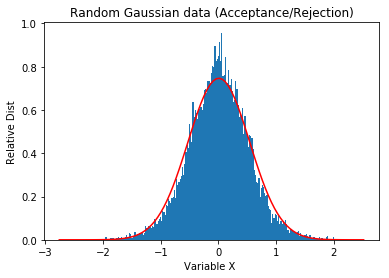

In [14]:
bins = np.linspace(math.ceil(min(norm_array)), 
                   math.floor(max(norm_array)),
                   200) # fixed number of bins

mean, var  = dist.distributions.norm.fit(norm_array)


x = np.linspace(min(norm_array),max(norm_array),100)


fitted_data = dist.distributions.norm.pdf(x, mean, var)
plt.hist(norm_array,bins=bins,density=True)
plt.plot(x,fitted_data,'r-')
plt.title('Random Gaussian data (Acceptance/Rejection)')
plt.xlabel('Variable X ')
plt.ylabel('Relative Dist')

plt.show()

For the sake of comparison. Lests use Scipy once again and compare with the previous plot.

In [15]:
norm_arr2=dist.norm.rvs(size=data_size)

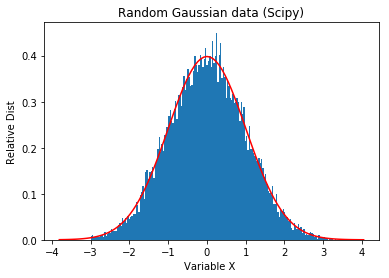

In [16]:
bins = np.linspace(math.ceil(min(norm_arr2)), 
                   math.floor(max(norm_arr2)),
                   200) # fixed number of bins

mean, var  = dist.distributions.norm.fit(norm_arr2)


x = np.linspace(min(norm_arr2),max(norm_arr2),100)


fitted_data = dist.distributions.norm.pdf(x, mean, var)
plt.hist(norm_arr2,bins=bins,density=True)
plt.plot(x,fitted_data,'r-')
plt.title('Random Gaussian data (Scipy)')
plt.xlabel('Variable X ')
plt.ylabel('Relative Dist')

plt.show()

## Conclusion:
In conclusion, we have taken a whirlwind survey on some methods on how to generate RV. 

1. Linear Gongruential Generatos
2. Inverse Transform methods
3. Acceptance rejection metjods
4. Python predefined functions (Numpy and Scipy)

Looking at the last two plots, it appears that the inbuilt packages give a better "visual" fit to the distribtion.